In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('collegePlace.csv')
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


In [11]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [12]:
y = df.iloc[:, -1]
X = df.iloc[:, :6]

In [5]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2961    0
2962    0
2963    0
2964    0
2965    1
Name: PlacedOrNot, Length: 2966, dtype: int64

<Axes: xlabel='PlacedOrNot', ylabel='count'>

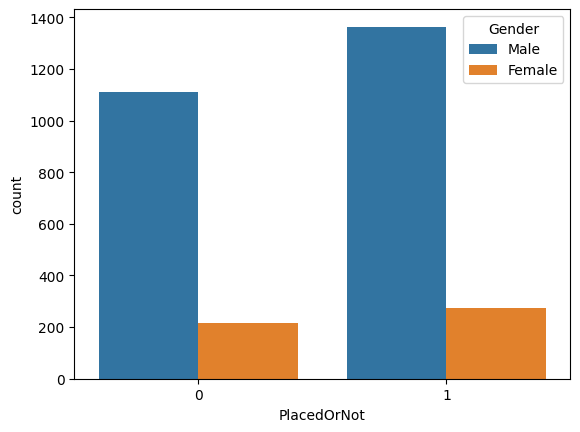

In [6]:
sns.countplot(x= y, hue=X['Gender'])

In [13]:
df_new = df.drop(['Gender','Stream'],axis=1)

In [30]:
df_new

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,8,1,1,1
1,21,0,7,1,1,1
2,22,1,6,0,0,1
3,21,0,8,0,1,1
4,22,0,8,1,0,1
...,...,...,...,...,...,...
2961,23,0,7,0,0,0
2962,23,1,7,1,0,0
2963,22,1,7,0,0,0
2964,22,1,7,0,0,0


In [14]:
def func(row):
    if row == 'Male':
        return 0
    elif row == 'Female':
        return 1

In [15]:
df['Gender'] = df['Gender'].apply(func)

In [16]:
df['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [17]:
def function(row):
    if row == 'Electronics And Communication':
        return 0
    elif row == 'Computer Science':
        return 1
    elif row == 'Information Technology':
        return 2
    elif row == 'Mechanical':
        return 3
    elif row == 'Electrical':
        return 4
    else:
        return 5

In [18]:
df['Stream'] = df['Stream'].apply(function)

In [19]:
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,0,0,1,8,1,1,1
1,21,1,1,0,7,1,1,1
2,22,1,2,1,6,0,0,1
3,21,0,2,0,8,0,1,1
4,22,0,3,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,0,2,0,7,0,0,0
2962,23,0,3,1,7,1,0,0
2963,22,0,2,1,7,0,0,0
2964,22,0,1,1,7,0,0,0


In [20]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
2458,19,0,3,1,8,1,0
509,21,0,2,0,7,0,0
1370,21,0,2,0,7,0,1
1352,26,0,1,1,7,0,0
1779,23,0,4,1,8,0,0
...,...,...,...,...,...,...,...
1638,22,0,1,3,8,0,0
1095,22,0,1,1,6,0,0
1130,22,1,5,1,8,0,0
1294,22,0,1,0,7,0,0


In [37]:
from sklearn.linear_model import LogisticRegression

In [46]:
model = LogisticRegression(penalty='l2', fit_intercept=True, random_state=None, solver='liblinear', max_iter=1000)

In [47]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [49]:
score = accuracy_score(y_pred, y_test)
score

0.7222222222222222

In [50]:
print(confusion_matrix(y_pred, y_test))

[[189  74]
 [ 91 240]]


In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
model_ensemble = RandomForestClassifier()

In [53]:
model_ensemble.fit(X_train,y_train)
y_pred_ensemble = model_ensemble.predict(X_test)

In [56]:
score = accuracy_score(y_test, y_pred_ensemble)
print("Ensemble score:\t", score)

Ensemble score:	 0.8872053872053872


In [57]:
confusion_matrix(y_test, y_pred_ensemble)

array([[261,  19],
       [ 48, 266]], dtype=int64)

In [58]:
from sklearn.svm import SVC

model_svm = SVC()

In [59]:
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

In [60]:
score_svm = accuracy_score(y_test, y_pred_svm)
score_svm

0.734006734006734